In [13]:
## set paths to catalog/script files and output directories (for plots)
data_dir = '../hdf5files/'
script_dir = '../SIP_jerome_scripts2/'
out_dir = '/Users/Andy/Desktop/'

In [2]:
## load plotting routines
execfile(script_dir+'plot_routines.py')

In [3]:
gdn = Table.read(data_dir+'gdn.hdf5')

/Users/Andy/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
gdn_selection = np.where ( \
                          (gdn['PhotFlag']==0) &\
                          (gdn['CLASS_STAR']>0.9) & \
                          (gdn['ACS_F606W_FLUX'] > 0) &\
                         (gdn['ACS_F814W_FLUX'] > 0) &\
                          (gdn['WFC3_F125W_FLUX'] > 0) &\
                         (gdn['WFC3_F160W_FLUX'] > 0))

# last 3 conditions ensure log10() exists

In [5]:
gdn_temp = gdn[gdn_selection]
gdn_selection2 = np.where ( \
                          -2.5*np.log10(gdn_temp['WFC3_F125W_FLUX']) <= 1.359465)
gdn_final = gdn_temp[gdn_selection2]

In [6]:
## define variables for GOODS-S

f606_gdn_flux = gdn_final['ACS_F606W_FLUX']
f814_gdn_flux = gdn_final['ACS_F814W_FLUX']  ## rest-frame .814 μm magnitude
f125_gdn_flux = gdn_final['WFC3_F125W_FLUX']   ## rest-frame 1.25 μm magnitude
f160_gdn_flux = gdn_final['WFC3_F160W_FLUX']   ## rest-frame 1.60 μm magnitude

f606_gdn_mag = -2.5*np.log10(f606_gdn_flux)
f814_gdn_mag = -2.5*np.log10(f814_gdn_flux)
f125_gdn_mag = -2.5*np.log10(f125_gdn_flux)
f160_gdn_mag = -2.5*np.log10(f160_gdn_flux)

f606_f814_gdn = f606_gdn_mag - f814_gdn_mag
f814_f125_gdn = f814_gdn_mag - f125_gdn_mag
f125_f160_gdn = f125_gdn_mag - f160_gdn_mag

mstar_gdn = gdn_final['M_med'] # already logged?
z_gdn = gdn_final['z_best_1']  ## redshift

In [7]:
f814_f125_gdn_sorted1 = [x for _,x in sorted(zip(f606_f814_gdn,f814_f125_gdn))]
f606_f814_gdn_sorted1 = np.sort(f606_f814_gdn)
movingmedian_f606_f814_gdn1 = np.array([])
movingmedian_f814_f125_gdn1 = np.array([])
for i in range (0,200):
    data2 = np.array([])
    for j in range(i,i+15):
        data2 = np.append(data2,f606_f814_gdn_sorted1[j])
    movingmedian_f606_f814_gdn1 = np.append(movingmedian_f606_f814_gdn1,np.median(data2))
for k in range (0,200):
    data3 = np.array([])
    for l in range(k,k+15):
        data3 = np.append(data3,f814_f125_gdn_sorted1[l])
    movingmedian_f814_f125_gdn1 = np.append(movingmedian_f814_f125_gdn1,np.median(data3))
# print movingmedian_f606_f814_gdn

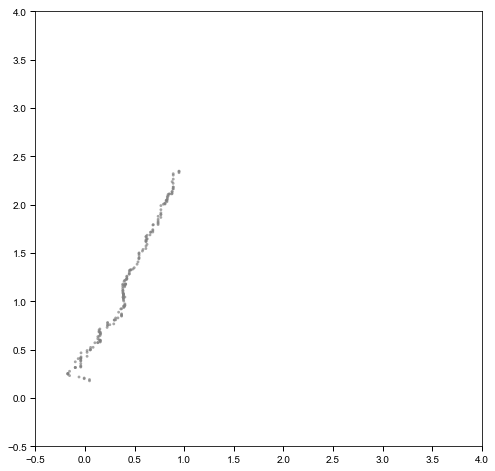

In [8]:
fig=plt.figure(figsize=(8,8))
plt.scatter(movingmedian_f814_f125_gdn1,movingmedian_f606_f814_gdn1,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.savefig('/Users/Andy/Desktop/GIJ_pt4_gdn_starlike_movingmedian.pdf')

In [9]:
f125_f160_gdn_sorted2 = [x for _,x in sorted(zip(f814_f125_gdn,f125_f160_gdn))]
f814_f125_gdn_sorted2 = np.sort(f814_f125_gdn)
movingmedian_f814_f125_gdn2 = np.array([])
movingmedian_f125_f160_gdn2 = np.array([])
for i in range (0,200):
    data2 = np.array([])
    for j in range(i,i+15):
        data2 = np.append(data2,f814_f125_gdn_sorted2[j])
    movingmedian_f814_f125_gdn2 = np.append(movingmedian_f814_f125_gdn2,np.median(data2))
for k in range (0,200):
    data3 = np.array([])
    for l in range(k,k+15):
        data3 = np.append(data3,f125_f160_gdn_sorted2[l])
    movingmedian_f125_f160_gdn2 = np.append(movingmedian_f125_f160_gdn2,np.median(data3))

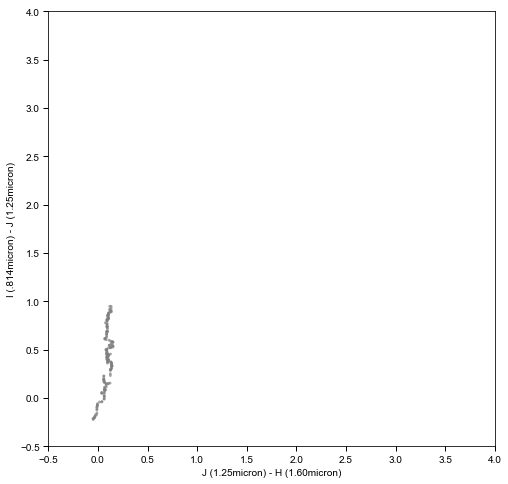

In [10]:
fig=plt.figure(figsize=(8,8))
plt.scatter(movingmedian_f125_f160_gdn2,movingmedian_f814_f125_gdn2,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig('/Users/Andy/Desktop/IJH_pt4_gdn_starlike_movingmedian.pdf')

In [11]:
distance1_gdn = np.array([]) # distance of x-value of GIJ from the moving median
distance2_gdn = np.array([]) # distance of x-value of IJH from the moving median
for i in range (7,200):
    distance1_gdn = np.append(distance1_gdn,movingmedian_f814_f125_gdn1[i-7]-f814_f125_gdn_sorted1[i])
    distance2_gdn = np.append(distance2_gdn,movingmedian_f125_f160_gdn2[i-7]-f814_f125_gdn_sorted2[i])

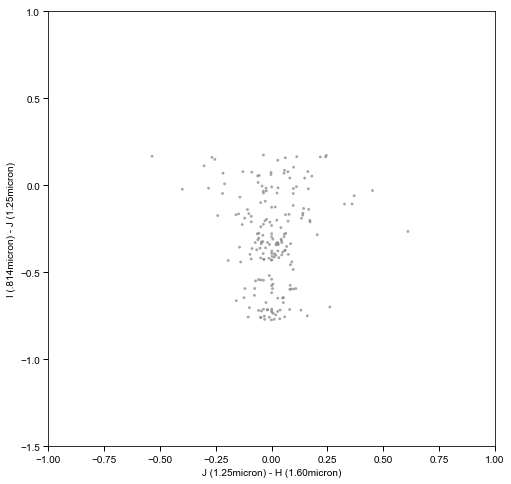

In [14]:
fig=plt.figure(figsize=(8,8))
plt.scatter(distance1_gdn,distance2_gdn,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-1,1)
plt.ylim(-1.5,1)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig(out_dir+'distance_diagram_gdn.pdf')